In [20]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
print("Faça o upload da imagem")
uploaded = files.upload()
nome_arquivo = list(uploaded.keys())[0]

Faça o upload da imagem


Saving plaentas.jpg to plaentas (4).jpg


In [22]:
imagem = cv2.imread(nome_arquivo)
if imagem is None:
    print("Não foi possível carregar a imagem")
    exit()

altura, largura, _ = imagem.shape

In [23]:
imagem_cinza = np.zeros((altura, largura), dtype=np.uint8)

In [24]:
for i in range(altura):
    for j in range(largura):
        azul, verde, vermelho = imagem[i, j]
        cinza = (vermelho * 0.3) + (verde * 0.59) + (azul * 0.11)
        imagem_cinza[i, j] = int(cinza)

In [25]:
imagem_binaria = np.zeros((altura, largura), dtype=np.uint8)
limiar = 128

In [26]:
for i in range(altura):
    for j in range(largura):
        if imagem_cinza[i, j] > limiar:
            imagem_binaria[i, j] = 255
        else:
            imagem_binaria[i, j] = 0

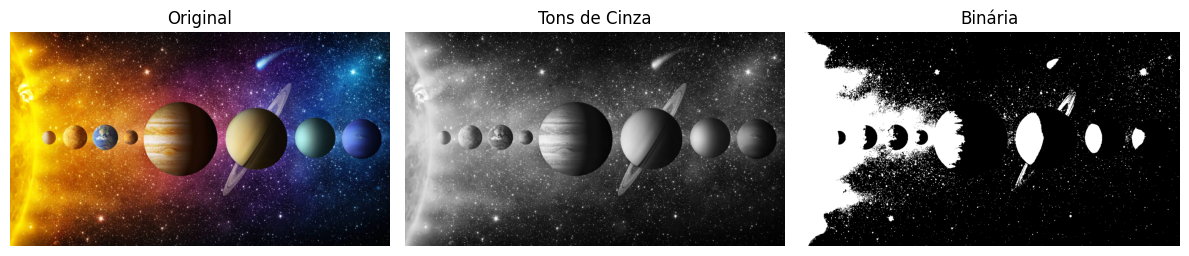

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Tons de Cinza')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagem_binaria, cmap='gray')
plt.title('Binária')
plt.axis('off')

plt.tight_layout()
plt.show()